Using Conifer and its default threshold method didn't give many results. We could play with the threshold, but let's see if using a different calling algorithm might work better.

Analyzing: CLIA_400123 
Setting multi-figure configuration


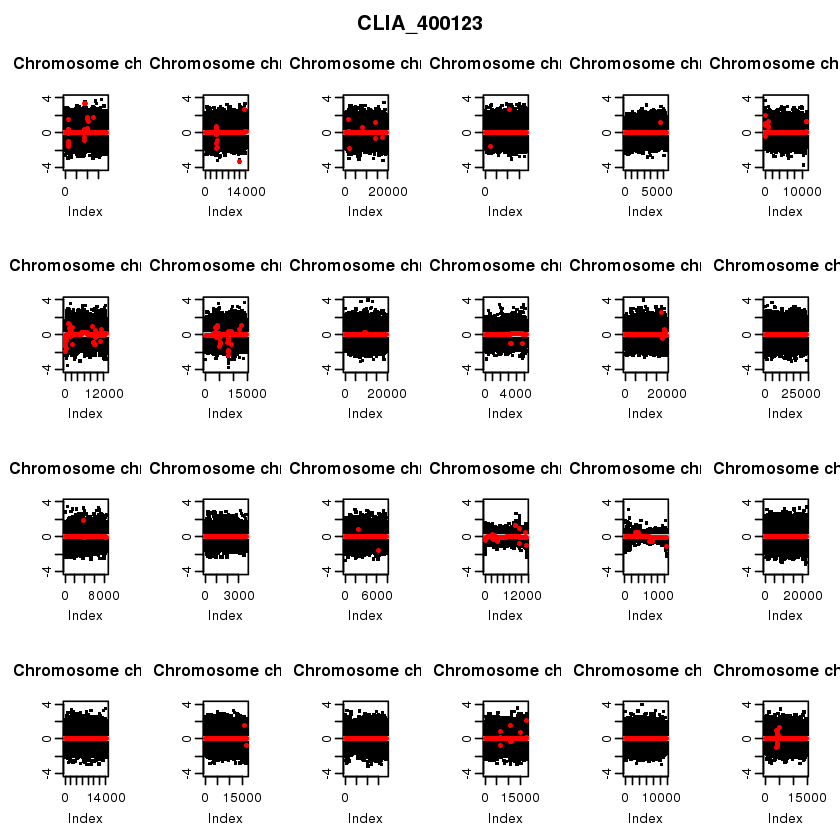

In [1]:
a = read.table('~/data/cnv/conifer84/export_svdzrpkm/CLIA_400123.bam.rpkm.bed')
library(DNAcopy)
CNA.object = CNA(cbind(a$V5), a$V1, a$V2, data.type='logratio', sampleid='CLIA_400123')
smoothed.CNA.object <- smooth.CNA(CNA.object)
segment.smoothed.CNA.object <- segment(smoothed.CNA.object, verbose=1)
plot(segment.smoothed.CNA.object, plot.type="s")

And if we do some filtering:

Analyzing: CLIA_400123 
Setting multi-figure configuration


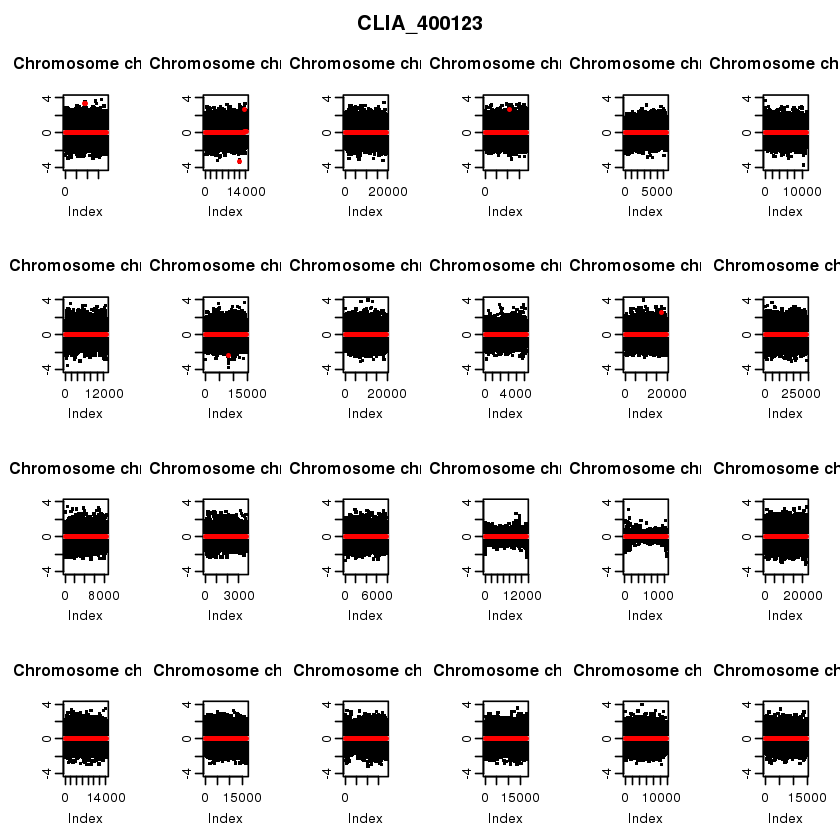

In [2]:
sdundo.CNA.object <- segment(smoothed.CNA.object, undo.splits="sdundo",undo.SD=3,verbose=1)
plot(sdundo.CNA.object, plot.type="s")

And the output is not trivial to work with, but with some filtering we'll be able to distinguish duplications from deletions:

In [3]:
sdundo.CNA.object$output

ID,chrom,loc.start,loc.end,num.mark,seg.mean
CLIA_400123,chr1,14415,110217264,17969,0.0218
CLIA_400123,chr1,110233203,110235735,2,3.3372
CLIA_400123,chr1,110242737,249231148,19481,0.0451
CLIA_400123,chr10,92828,115481306,11934,0.0175
CLIA_400123,chr10,115485106,115485829,2,-3.2565
CLIA_400123,chr10,115486029,129906764,1830,0.0565
CLIA_400123,chr10,129906937,129907305,3,2.6385
CLIA_400123,chr10,129907452,135515805,592,0.0930
CLIA_400123,chr11,86590,134605741,19499,0.0249
CLIA_400123,chr12,67852,69050816,10714,0.0282


In [5]:
write.table(sdundo.CNA.object$output[,2:6], file="~/tmp/out.file", row.names=F, col.names=F, quote=F, sep="\t")

OK, let's loop through subjects now. It's not too costly, but we could certainly swarm this in the future. It's also easy enough to play with different parameters, such as cleaning options and minimum length of CNV.

Best to run it in a terminal so we can observe the output:

In [22]:
library(DNAcopy)

data_dir = '~/data/cnv/conifer84/export_svdzrpkm/'
out_dir = '~/data/cnv/conifer84/dnacopy/'
files = list.files(path=data_dir, pattern='*bam.rpkm.bed')
for (fname in files) {
    sname = strsplit(x=fname, split = '[.]')[[1]][1]
    df = read.table(paste(data_dir, fname, sep=''))
    CNA.object = CNA(cbind(df$V5), df$V1, df$V2, data.type='logratio',
                     sampleid=sname)
    smoothed.CNA.object <- smooth.CNA(CNA.object)
    sdundo.CNA.object <- segment(smoothed.CNA.object, undo.splits="sdundo",
                                 undo.SD=3, verbose=1)
    write.table(sdundo.CNA.object$output[,2:6],
                file=paste(out_dir, sprintf('%s_min2undo3SD.txt', sname), sep=''),
                row.names=F, col.names=F, quote=F, sep="\t")
}

But if this looks half-decent, it's certainly worth swarming it, as it'll run in a couple minutes.

# TODO

* Write algorithm to parse outputs
* Check if there's anything there using the analysis toolbox from before
* Vary a few parameters (undo, length)
* Try other alignment method?
* Go back and take a second look at XHMM results using 84 samples.